## <b> Выбор и проверка гипотез по увеличению выручки интернет-магазина. Анализ A/B-теста </b>
Имеем список  гипотез для увелечинеия выручки онлайн магазина.  
Наши задачи:  
1. Приоритизировать гипотезы. Файл со списком гипотез [hypotesys](https://code.s3.yandex.net/datasets/hypothesis.csv). В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
2. Запустить A/B-тест и проанализировать результаты,  которые описаны в файлах [orders](https://code.s3.yandex.net/datasets/orders.csv) и [visitors](https://code.s3.yandex.net/datasets/visitors.csv).


Подключим библиотеки, изучим файл с гипотезами

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [ ]:
# чтение файла с данными
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
hypothesis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
#приведем названия стобцов к нижнем регистру:

hypothesis.columns = hypothesis.columns.str.lower()


В таблице 'hypothesis' содержатся 9 гипотез со следующими столбцами:

Hypothesis — описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

### <b>1. Проведем приоритизацию гипотез


### 1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
pd.set_option('max_colwidth', 150)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Топ - 3 приоритетных гипотез по ICE:  
-Запустить акцию, дающую скидку на товар в день рождения.  
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.  
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок



### 1.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
pd.set_option('max_colwidth', 150)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Топ - 3 приоритетных гипотез по RICE:  
-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.  
-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


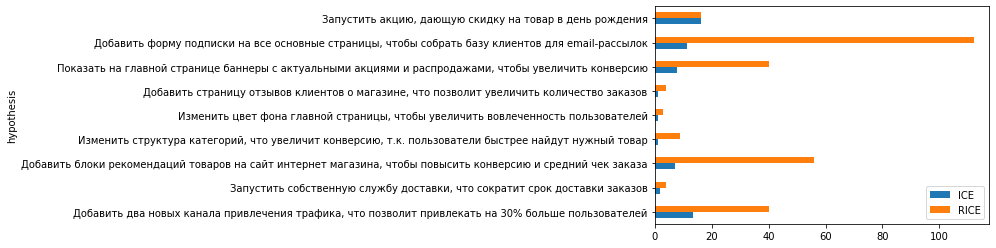

In [ ]:
hypothesis.set_index('hypothesis')[['ICE','RICE']].plot(kind='barh');

<b> Вывод:</b>   
Первая пятерка гипотез совпадает у ICE и RICE, но в целом результаты сильно отличаются друг от друга. Приоритизация по RICE отличается от приоритизации по ICE тем, что также оценивает и охват пользователей. Лидеры среди гипотез фреймворка RICE являются наиболее приоритетными.

### <b> 2. Анализ A/B-теста

Предобработка данных

In [ ]:
# читаем файлы с данными
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
print(orders)
visitors

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     1650     B
1        2804400009  3642806036  2019-08-15      730     B
2        2961555356  4069496402  2019-08-15      400     A
3        3797467345  1196621759  2019-08-15     9759     B
4        2282983706  2322279887  2019-08-15     2308     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14     6490     B
1193     2203539145   370388673  2019-08-14     3190     A
1194     1807773912   573423106  2019-08-14    10550     A
1195     1947021204  1614305549  2019-08-14      100     A
1196     3936777065  2108080724  2019-08-15   202740     B

[1197 rows x 5 columns]


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
# смотрим инфо 
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# переименуем столбцы с учетом змеиного регистра
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']


Проверим наличие дубликатов

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

Изменим тип данных столбцов date с object на datetime64

In [ ]:
visitors['date'] = visitors['date'].astype('datetime64')
orders['date'] = orders['date'].astype('datetime64')

Проверим распределение по группам

In [ ]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Дубликатов не обнаружено, типы данных в столбцах со временем привели к нужному типу, наименования несколькив столбцов привели к более читабельному виду

Подготовим файл для подсчета кумулятивной выручки по группам 

In [ ]:
#Создадим датафрейм с уникальными парами значений дат и групп тестаблицы orders. 
#и избавимся от дубликатов методомта методом drop_duplicates()
dates_groups = orders[['date','group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

### 2.1 Построим график кумулятивной выручки по группам.

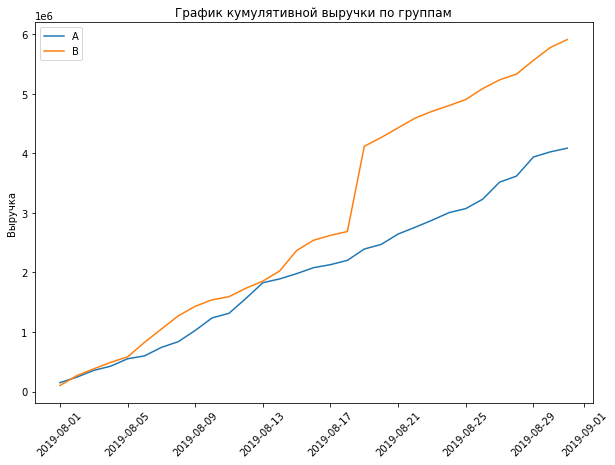

In [ ]:
plt.figure(figsize=(10, 7))
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend();

Выручка постоянно растет, но график выручки группы B резко растет в середине теста. На это могло повлиять резкое увеличение числа заказов, либо появление очень дорогих заказов в выборке.

### 2.2 Построим график кумулятивного среднего чека по группам.

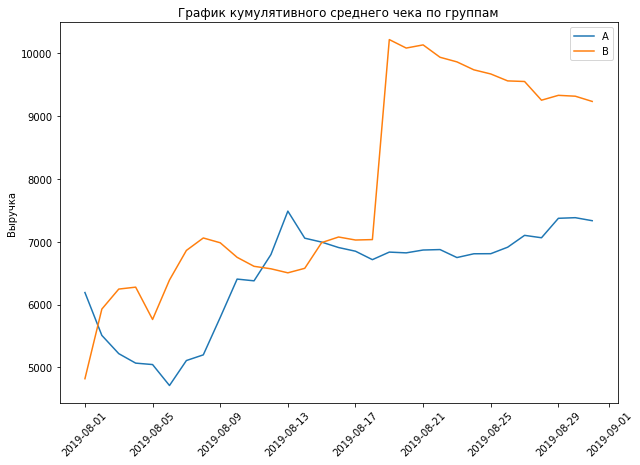

In [ ]:
plt.figure(figsize=(10, 7))
# график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# график среднего чека группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend();

График среднего чека выравнивается толлько к концу теста, немного увеличивается для группы A, и снижается для группы B. Для группы B снова видим резкий скачок в середине месяца. Предположим, что виной этому крупные заказы

### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

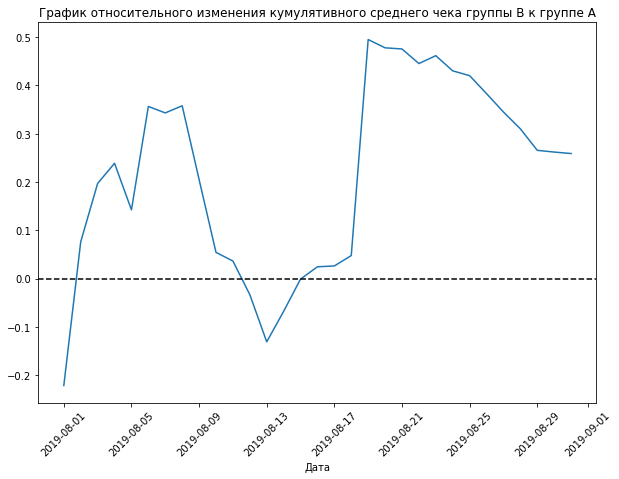

In [ ]:
plt.figure(figsize=(10, 7))
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.xlabel('Дата');

Результаты теста значительно и резко менялись в несколько дат. В одну из дат как раз и были совершены аномальные заказы.

### 2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам.

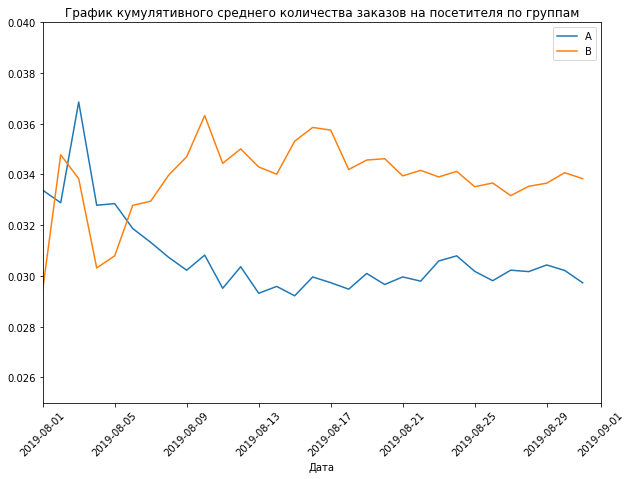

In [ ]:
plt.figure(figsize=(10, 7))
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.xlabel('Дата');

График ассиметричен, первоначально преобладала конверсия группы А, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### 2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

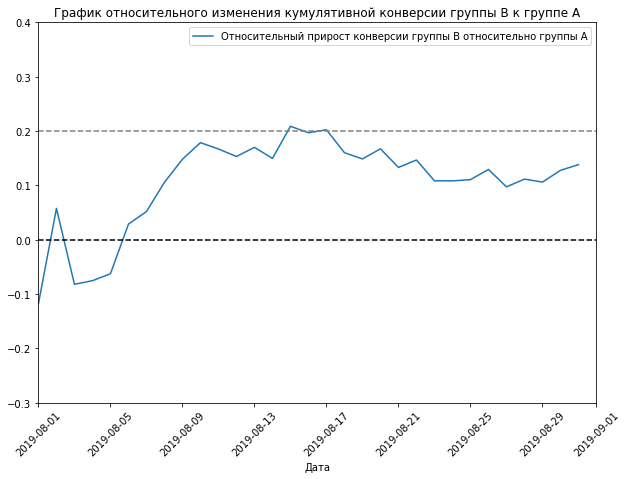

In [ ]:
register_matplotlib_converters()
merged_cumulative_conversions = cumulative_data_a[
    ['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                           left_on='date', 
                                                           right_on='date', 
                                                           how='left', 
                                                           suffixes=['A', 'B'])
plt.figure(figsize=(10, 7))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.4])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=45);

Мы построили график относительного различия конверсии между группами.
Почти с самого начала теста группа В лидирует по конверсии: к середине месяца достигает пика, далее немного снижается, и к концу месяца составляет примерно 15% прироста относительно группы A.

### 2.6 Построим точечный график количества заказов по пользователям.

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


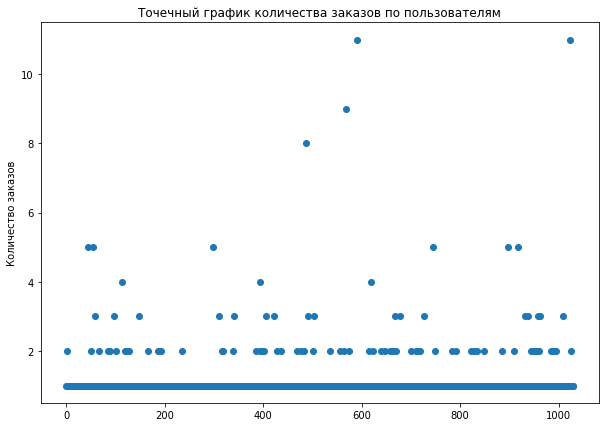

In [ ]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']
print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в orders_by_users
plt.figure(figsize=(10, 7))
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

Пользователей, которые сделали более двух заказов совсем мало. Есть определенное количество пользователей которые сделали два заказа. Для того, чтобы оценить насколько это много или мало, нужно посчитать выборочные перцентили.

### 2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [ ]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше 4 заказов.  
 Границу для определения аномальных пользователей логично было бы выбрать на отметке в 2 заказа на одного пользователя

### 2.8 Построим точечный график стоимостей заказов.

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


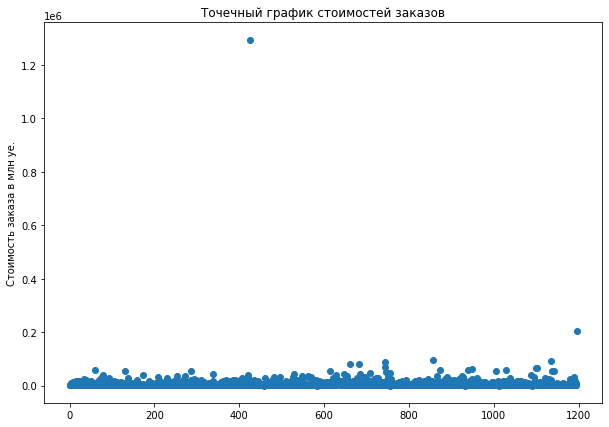

In [ ]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн уе.');

Видим явную аномалию в лице заказа стоимостью более 1,2 млн, вероятнее всего именно "благодаря" ему наблюдали резкие скачки на графиках ранее. также выбивается заказ стоимостью в районе 200 тысяч

### 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 тыс. Не больше, чем у 1% - дороже 58233,2.  
 Границей для определения аномальных заказов следует обозначить 28 тыс. у.е.

### 2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Нулевая гипотеза: различий в конверсии между группами нет.

Альтернативная гипотеза: различия в конверсии между группами есть.

In [ ]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitorsPerDateA']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitorsCummulativeA']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitorsPerDateB']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitorsCummulativeB']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.017
0.138


  P-value = 0.017, что значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13.8%. 

### 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

0.729
0.259


P-value больше 0.05  - статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами - 25,9%.

### 2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

За аномальных пользователей примем тех, кто совершил более 2х заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users.

In [ ]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


In [ ]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.01304
0.173


Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем, статистическая значимость достигнута. Сегмент В значительно лучше сегмента A по конверсии на 17,3%, показетель лучше, чем до "очистки" данных.

### 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value практически не изменился, нулевую гипотезу отвергнуть не можем. А средний чек заметно снизился, и стал даже меньше, чем у сегмента A, на 2%. Наблдюдаем, что после "очистки" данных, разница в среднем чеке между двумя группами сократилась до минимума.

## <b> Вывод</b>
- График различия конверсии между группами сообщает, что результаты группы b лучше группы a: имеют тенденцию к росту и практически зафиксировались около среднего значения;
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами как по сырым, так и по очищенным данным;
- График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий;



<b>Исходя из полученных результатов рекомендуется остановить тест и зафиксировать победу группы b, так как есть статистически значимое различие по конверсии между группами, относительный прирост конверсии группы b составляет 17,3 %.  
